In [1]:
import pandas as pd
df = pd.read_csv('breast_cancer.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
X = df.drop(['0', '1'], axis=1).values
y = df['1'].values


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['M', 'B'])

array([1, 0])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, 
    stratify=y,
    random_state=1
)

In [6]:
#pypline позволяет объединить несколько шагов в 1 конвеер
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [7]:
pipe_lr = make_pipeline(StandardScaler(),                       #преобразователь
                        PCA(n_components=2),                    #преобразователь
                        LogisticRegression(random_state=1,      #оценщик
                                           solver = 'lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
pipe_lr.score(X_test, y_test)
#make_pipeline принимает произвольное количество преобразователей (с методами fit и transform)
#за которыми идет оценщик sklearn с методами fit и predict


0.956140350877193

In [8]:
#для кросс валидации по k болкам обычно используют k = 10, но для маленьких наборов имеет смысл увеличить k
#при несоблюдении балланса классов имеет смысл использовать стратифицированную валидацию по k блокам (сохранять доли классов в наборах)


In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f'Блок {k+1}, распределение классов {np.bincount(y_train[train])}, правильность {score}')

Блок 1, распределение классов [256 153], правильность 0.9347826086956522
Блок 2, распределение классов [256 153], правильность 0.9347826086956522
Блок 3, распределение классов [256 153], правильность 0.9565217391304348
Блок 4, распределение классов [256 153], правильность 0.9565217391304348
Блок 5, распределение классов [256 153], правильность 0.9347826086956522
Блок 6, распределение классов [257 153], правильность 0.9555555555555556
Блок 7, распределение классов [257 153], правильность 0.9777777777777777
Блок 8, распределение классов [257 153], правильность 0.9333333333333333
Блок 9, распределение классов [257 153], правильность 0.9555555555555556
Блок 10, распределение классов [257 153], правильность 0.9555555555555556


In [10]:
print(f'точность перекрестной проверки {np.mean(scores)} +/- {np.std(scores)}')

точность перекрестной проверки 0.9495169082125603 +/- 0.013854294239660376


In [11]:
#прочитать про enumerate и итераторы

In [12]:
#то же самое но более кратко
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X = X_train,
                         y = y_train,
                         cv =10,
                         n_jobs=1)
print(f'Меры правильности перекрестной проверки {scores}')

Меры правильности перекрестной проверки [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [13]:
print(f'точность перекрестной проверки {np.mean(scores)} +/- {np.std(scores)}')

точность перекрестной проверки 0.9495169082125603 +/- 0.013854294239660376


In [14]:
#если модель недообучена (высок смещение) то: сбор/консруирование доп. признаков
#уменьшение степени регуляризации
#если модель переобучена (высок дисперсия) то: больше обуч данных, понижение сложности модели
#увеличение параметра регуляризации, если модель нерегуляризуется, то уменьшение количества/выделение признаков
#новые данные могут не помочь если в них шум или если модель близка к оптимальной

Text(0, 0.5, 'Правильность')

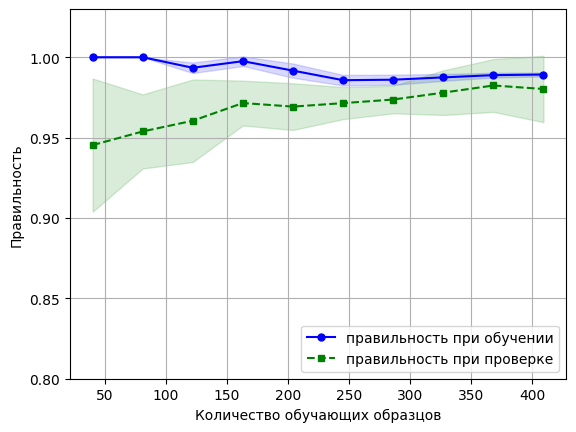

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
#кривая обучения
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1,
                                           solver='lbfgs',
                                           max_iter=10000,
                                           penalty='l2'))
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,
                     X = X_train,
                     y = y_train,
                     train_sizes=np.linspace(0.1, 1.0, 10),
                     cv = 10,
                     n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color = 'blue', marker = 'o',
         markersize = 5, label = 'правильность при обучении')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
         color = 'green', marker = 's',
         linestyle = '--',
         markersize = 5, label = 'правильность при проверке')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color = 'green')

plt.grid()
plt.ylim([0.8, 1.03])
plt.legend(loc='lower right')
plt.xlabel('Количество обучающих образцов')
plt.ylabel('Правильность')


Text(0, 0.5, 'Правильность')

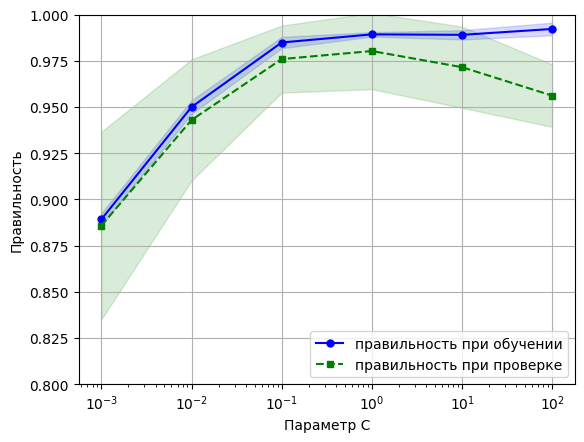

In [16]:
#кривая проверки - на оси х вместо размера обучающей выборки значение того или иного параметра
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                                             estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv = 10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean,
         color = 'blue', marker='o',
         markersize = 5, label='правильность при обучении')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean,
         color = 'green', marker = 's',
         linestyle = '--',
         markersize = 5, label = 'правильность при проверке')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color = 'green')

plt.xscale('log')
plt.grid()
plt.ylim([0.8, 1.0])
plt.legend(loc='lower right')
plt.xlabel('Параметр С')
plt.ylabel('Правильность')

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range=[0.0001, 0.001, 0.01, 0.1,
             1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
               {'svc__gamma': param_range,
                'svc__C': param_range,
                'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv = 10,
                  refit=True,#обеспечивает автоматическую погдонку лучшей модели к целому обучающему набору
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [18]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9736842105263158


In [19]:
#прием для выбора алгоритма МО - вложенная перекрестная проверка

In [20]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  cv = 2)
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv = 5)
print(f'Точность перекрестной проверки {np.mean(scores)} +/- {np.std(scores)}')

Точность перекрестной проверки 0.9736263736263737 +/- 0.014906219743132467


In [21]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(
                                                   random_state=0),
                  param_grid=[{'max_depth' : [1, 2, 3,
                                              4, 5, 6,
                                              7, None]}],
                  scoring='accuracy',
                  cv = 2
)
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv = 5)
print(f'Точность перекрестной проверки {np.mean(scores)} +/- {np.std(scores)}')

Точность перекрестной проверки 0.9340659340659341 +/- 0.015540808377726326


In [22]:
#т. о. видно что использование svc лучше

In [23]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


Text(0, 0.5, 'нстоящая метка')

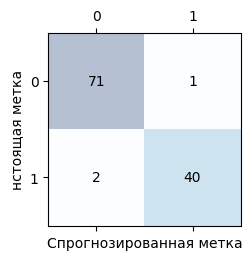

In [24]:
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
        
plt.xlabel('Спрогнозированная метка')
plt.ylabel('нстоящая метка')

In [25]:
#tpr и fpr полезны в задачах с дисбаллансом классов
#recall практически синоним tpr

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Точность ', precision_score(
    y_true=y_test, y_pred=y_pred))
print('Полнота ', recall_score(
    y_true=y_test, y_pred=y_pred))
print('f1 ', f1_score(
    y_true=y_test, y_pred=y_pred
))


Точность  0.975609756097561
Полнота  0.9523809523809523
f1  0.963855421686747


In [27]:
#прочитать про make_scorer
from sklearn.metrics import make_scorer
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
               {'svc__gamma': c_gamma_range,
                'svc__C': c_gamma_range,
                'svc__kernel': ['rbf']}]
scorer = make_scorer(f1_score, pos_label=0)#поменяли местами истинный класс с 1 на 0???????????7
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv = 10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


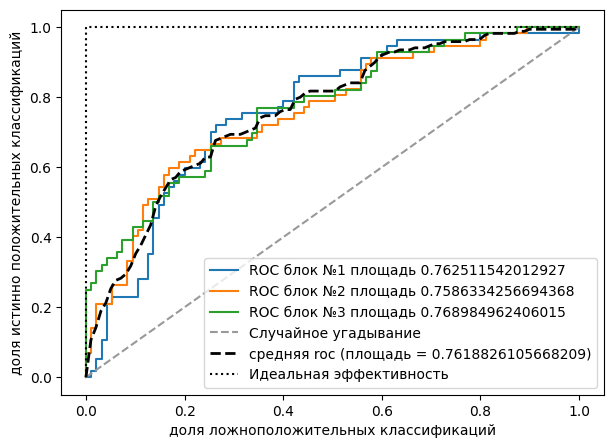

In [32]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))
X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3,
                          random_state=1,
                          shuffle = True).split(X_train,
                                                y_train),
                          )
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(
        X_train2[train],
        y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             label=f'ROC блок №{i+1} площадь {roc_auc}')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color = (0.6, 0.6, 0.6),
         label='Случайное угадывание')
mean_tpr /=len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label = f'средняя roc (площадь = {mean_auc})', lw = 2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle = ':',
         color = 'black',
         label = 'Идеальная эффективность')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('доля ложноположительных классификаций')
plt.ylabel('доля истинно положительных классификаций')
plt.legend()

In [33]:
#микросреднее вычисляется из индивидуальных прогнозов tp, tn, fp, fn системы
#макросреднее - среднее из показателей точности различных систем
pre_scorer = make_scorer(score_func=precision_score,
                         pos_label = 1,
                         greater_is_better=True,
                         average='micro')

In [35]:
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))

In [36]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb)

0.8992443324937027

In [37]:
#один из вариантов решения проблемы дисбаланса класса установка параметра class_weight = 'balanced'
#мы будем штрафовать модель больше за ошибки на миноритарном классе, тем самым скомпенсируем количество штрафов их размерами
from sklearn.utils import resample
print('Начальное количество образцов класса 1', X_imb[y_imb == 1].shape[0])

Начальное количество образцов класса 1 40


In [38]:
#повышение дискретизации миноритарного класса
X_upsampled, y_upsampled = resample(
    X_imb[y_imb == 1],
    y_imb[y_imb == 1],
    replace=True,
    n_samples=X_imb[y_imb == 0].shape[0],
    random_state=123
)
print('Конечное количество образцов класса 1', X_upsampled.shape[0])

Конечное количество образцов класса 1 357


In [39]:
X_bal = np.vstack((X[y==0], X_upsampled))
y_bal = np.hstack((y[y==0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal)

0.5

In [ ]:
#еще 1 вариант - генерация искусственных обучающих образцов (SMOTE)
#для решения этой проблемы есть библиотека imbalanced-learn